# Credit Card Fraud Detection

#### Final Project - Data Science Course - BrainStation 
###### Mohammad Sohanoor Rahman
Submission Date: 01 February 2024

#### Context

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

#### Content

The dataset contains transactions made by credit cards in September 2013 by European cardholders.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [1]:
#!pip uninstall scikit-learn --yes
#!pip uninstall imblearn --yes
#!pip install scikit-learn==1.2.2
#!pip install imblearn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , ConfusionMatrixDisplay ,precision_score,recall_score,f1_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [3]:
data = pd.read_csv("creditcard.csv")

#### Data Exploration 

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [6]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [7]:
data.shape

(284807, 31)

In [8]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [10]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Exploratory Analysis

In [11]:
# Correlation matrix

# A correlation matrix is a statistical technique used to evaluate the relationship between 
# two variables in a data set. The matrix is a table in which every cell contains a correlation 
# coefficient, where 1 is considered a strong relationship between variables, 0 a neutral relationship 
# and -1 a not strong relationship.

def plotCorrelationMatrix(df, graphWidth):
    filename = "creditcard.csv"
    df = df.dropna()
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

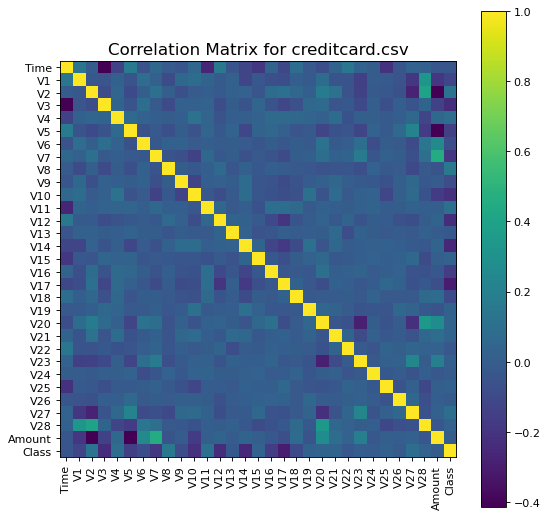

In [12]:
data_1 = pd.read_csv('creditcard.csv', delimiter=',', nrows = 1000)
plotCorrelationMatrix(data.sample(1_000), 8)

In [13]:
# Scatter and density plots

# It shows how numerical data, binned into intervals, is distributed across the X-axis and the Y-axis. 
# The markers that represent the binned values are shaped as tiled markers.

def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna()
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [14]:
data.sample(1_000)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
85745,60920.0,1.214563,0.047203,0.081784,0.945697,0.126392,0.379023,-0.098099,0.127380,0.316239,...,-0.224574,-0.538133,-0.186372,-0.843703,0.718836,-0.401846,0.022014,0.003435,21.70,0
86033,61055.0,-3.914609,-1.406893,1.919868,1.503341,0.406231,-0.394832,-1.075679,-0.184150,-0.054814,...,0.417097,-0.799404,-1.328392,0.583376,-0.142113,0.734106,0.801054,-0.846836,132.00,0
155472,105524.0,0.024718,0.667521,1.762178,0.126673,-0.392035,-0.111154,-0.370694,-0.840847,1.760732,...,0.396032,-1.056448,-0.294342,-0.202316,1.314307,-0.571607,0.111584,0.149998,2.12,0
146009,87348.0,-0.977255,0.448598,-0.894162,-0.756319,1.038867,-0.434396,0.839009,0.454755,-0.510976,...,0.144104,0.121212,-0.042486,0.204791,-0.124631,0.468817,0.173411,0.086473,74.99,0
150582,93708.0,1.763900,-0.381389,-1.792586,0.690047,0.088524,-0.806915,0.061021,-0.223372,2.513225,...,-0.337626,-0.890560,0.121738,0.521493,-0.164540,-0.170444,-0.074870,0.000286,150.94,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27956,34783.0,-2.338267,-2.024085,2.113797,0.862845,-1.381312,1.581788,1.892595,0.224952,0.334062,...,0.603724,0.814474,1.138134,-0.038722,0.825790,-0.232208,-0.307058,-0.106557,650.00,0
148212,89570.0,-1.906460,1.715270,0.551242,-0.891789,0.361536,1.461342,-1.094610,-3.225150,0.242338,...,-0.662046,-0.149919,0.103956,-0.199076,-0.266202,-0.632960,-0.600088,-0.248726,10.00,0
193875,130331.0,-0.018306,1.094250,0.084907,0.286614,0.653599,-0.089576,0.345769,0.213642,-0.369216,...,-0.296058,-0.840439,0.128077,0.446799,-0.706609,0.228272,0.073188,0.110019,26.10,0
153698,99885.0,-1.398567,1.668621,0.739098,-1.118368,0.668670,-0.111623,0.500598,0.346470,0.878497,...,-0.678694,-1.877555,-0.086909,-0.073953,0.310471,0.123968,0.015098,0.106737,5.99,0


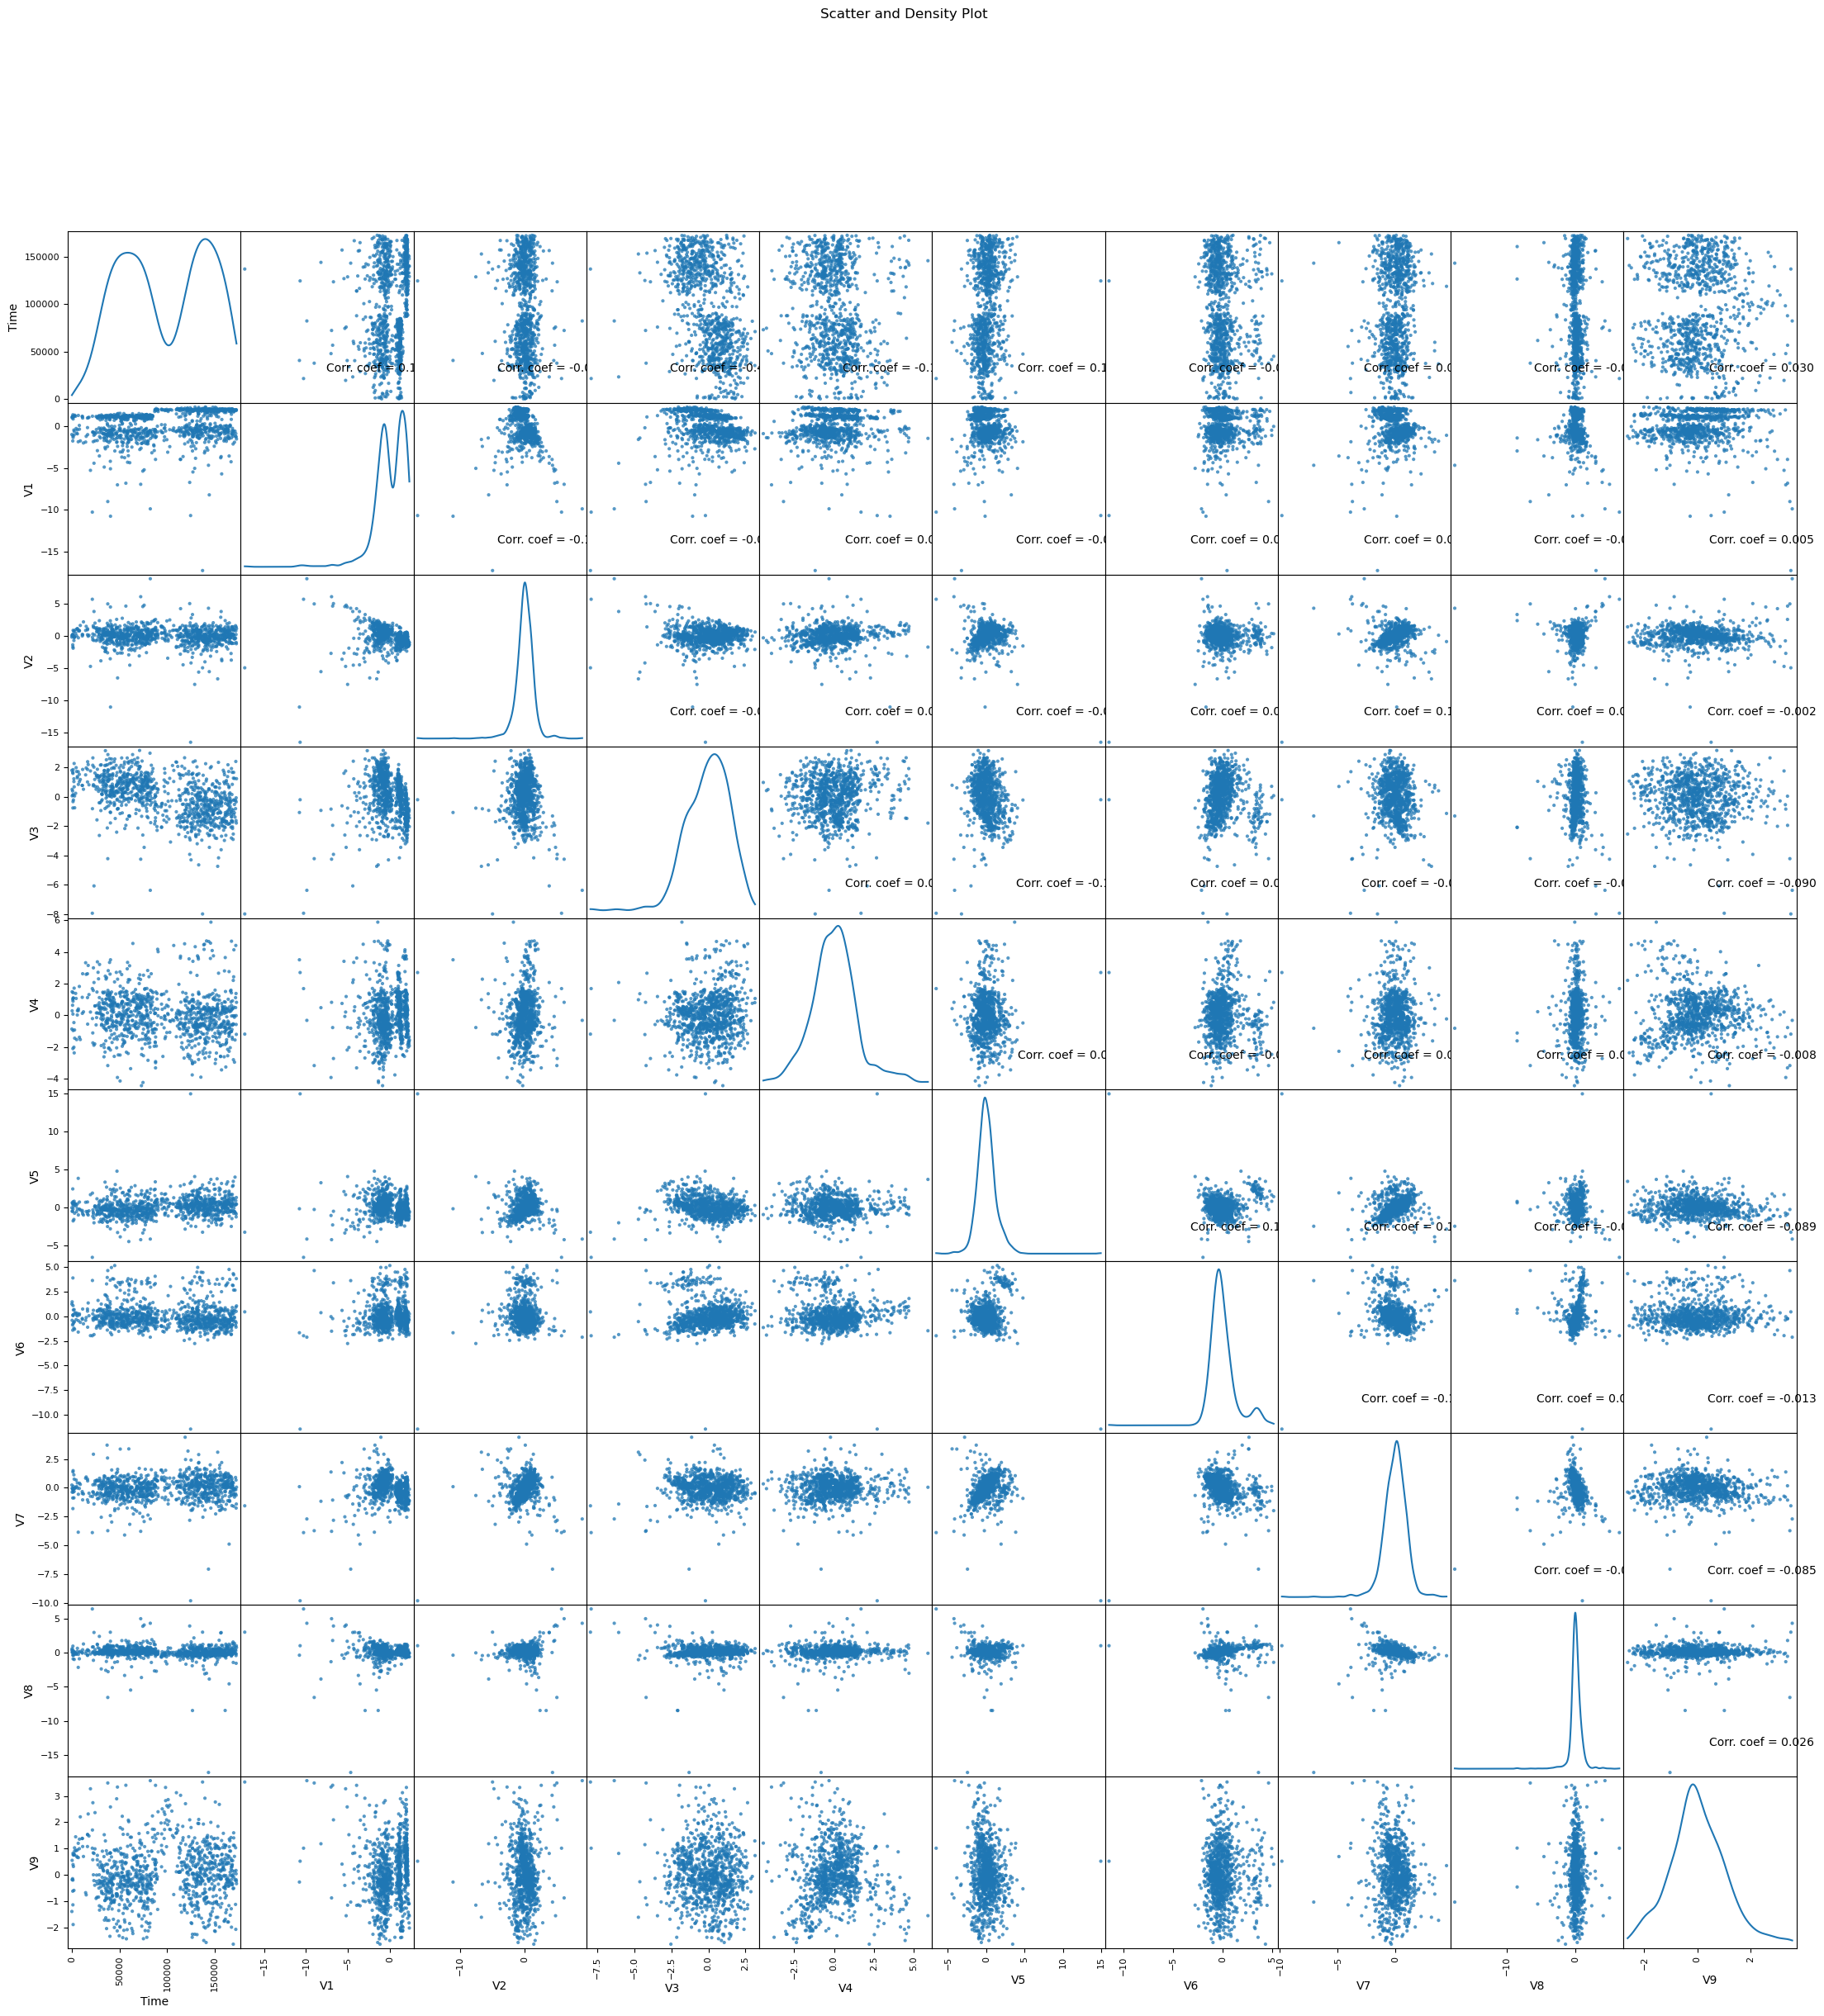

In [15]:
data_2 = pd.read_csv('creditcard.csv', delimiter=',', nrows = 1000)
plotScatterMatrix(data.sample(1_000), 27, 10)

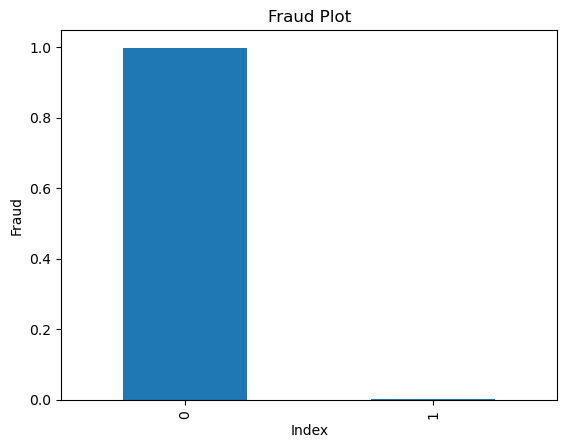

In [16]:
data['Class'].value_counts(normalize=True).plot(kind='bar')
plt.xlabel('Index')
plt.ylabel('Fraud')
plt.title('Fraud Plot')
plt.show()

In [17]:
fraudpercentage = data['Class'].value_counts(normalize=True)[1] *100 
fraudpercentage

0.1727485630620034

Check Outlires

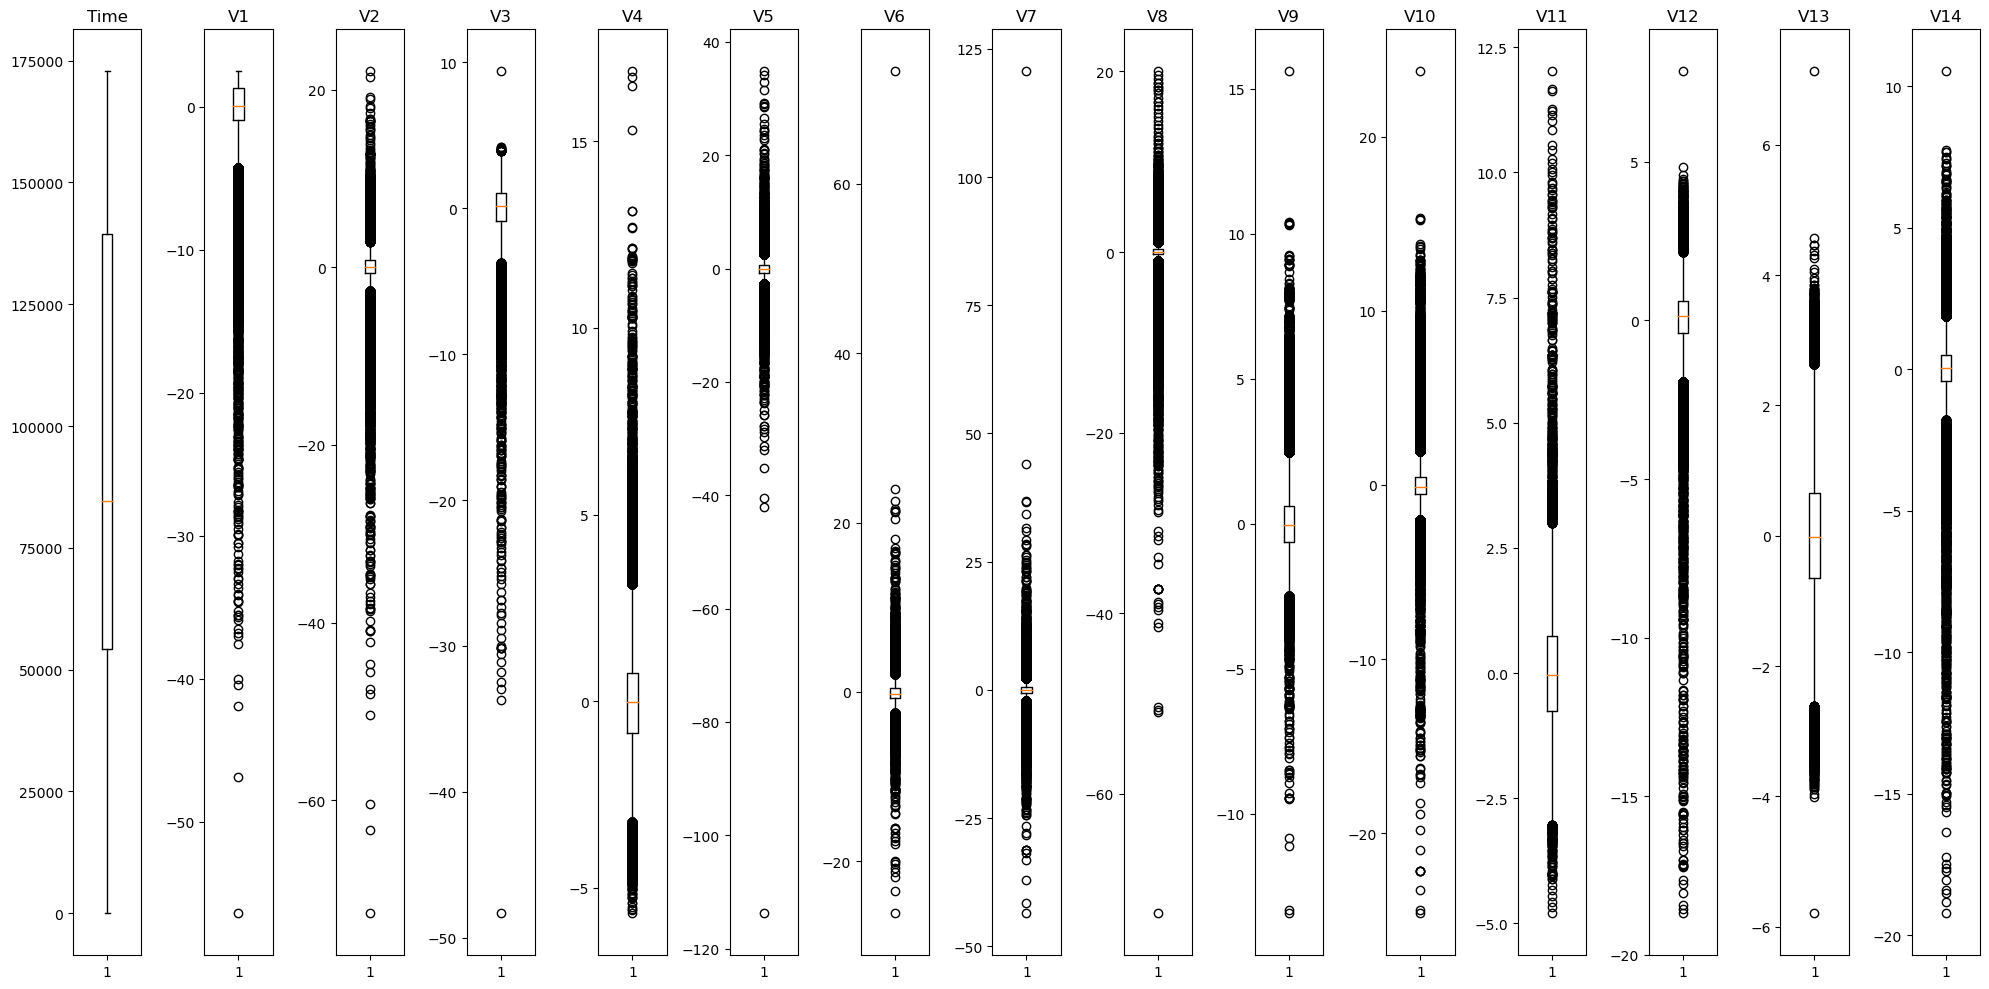

In [18]:
#make boxplots to check outlires (v1 - v14)
fig,axis = plt.subplots(1,15,figsize=(20,10))
for i, ax in enumerate(axis.flat):
    ax.boxplot(data.drop(columns=['Class']).iloc[:,i])
    ax.set_title(data.drop(columns=['Class']).columns[i])
plt.tight_layout()


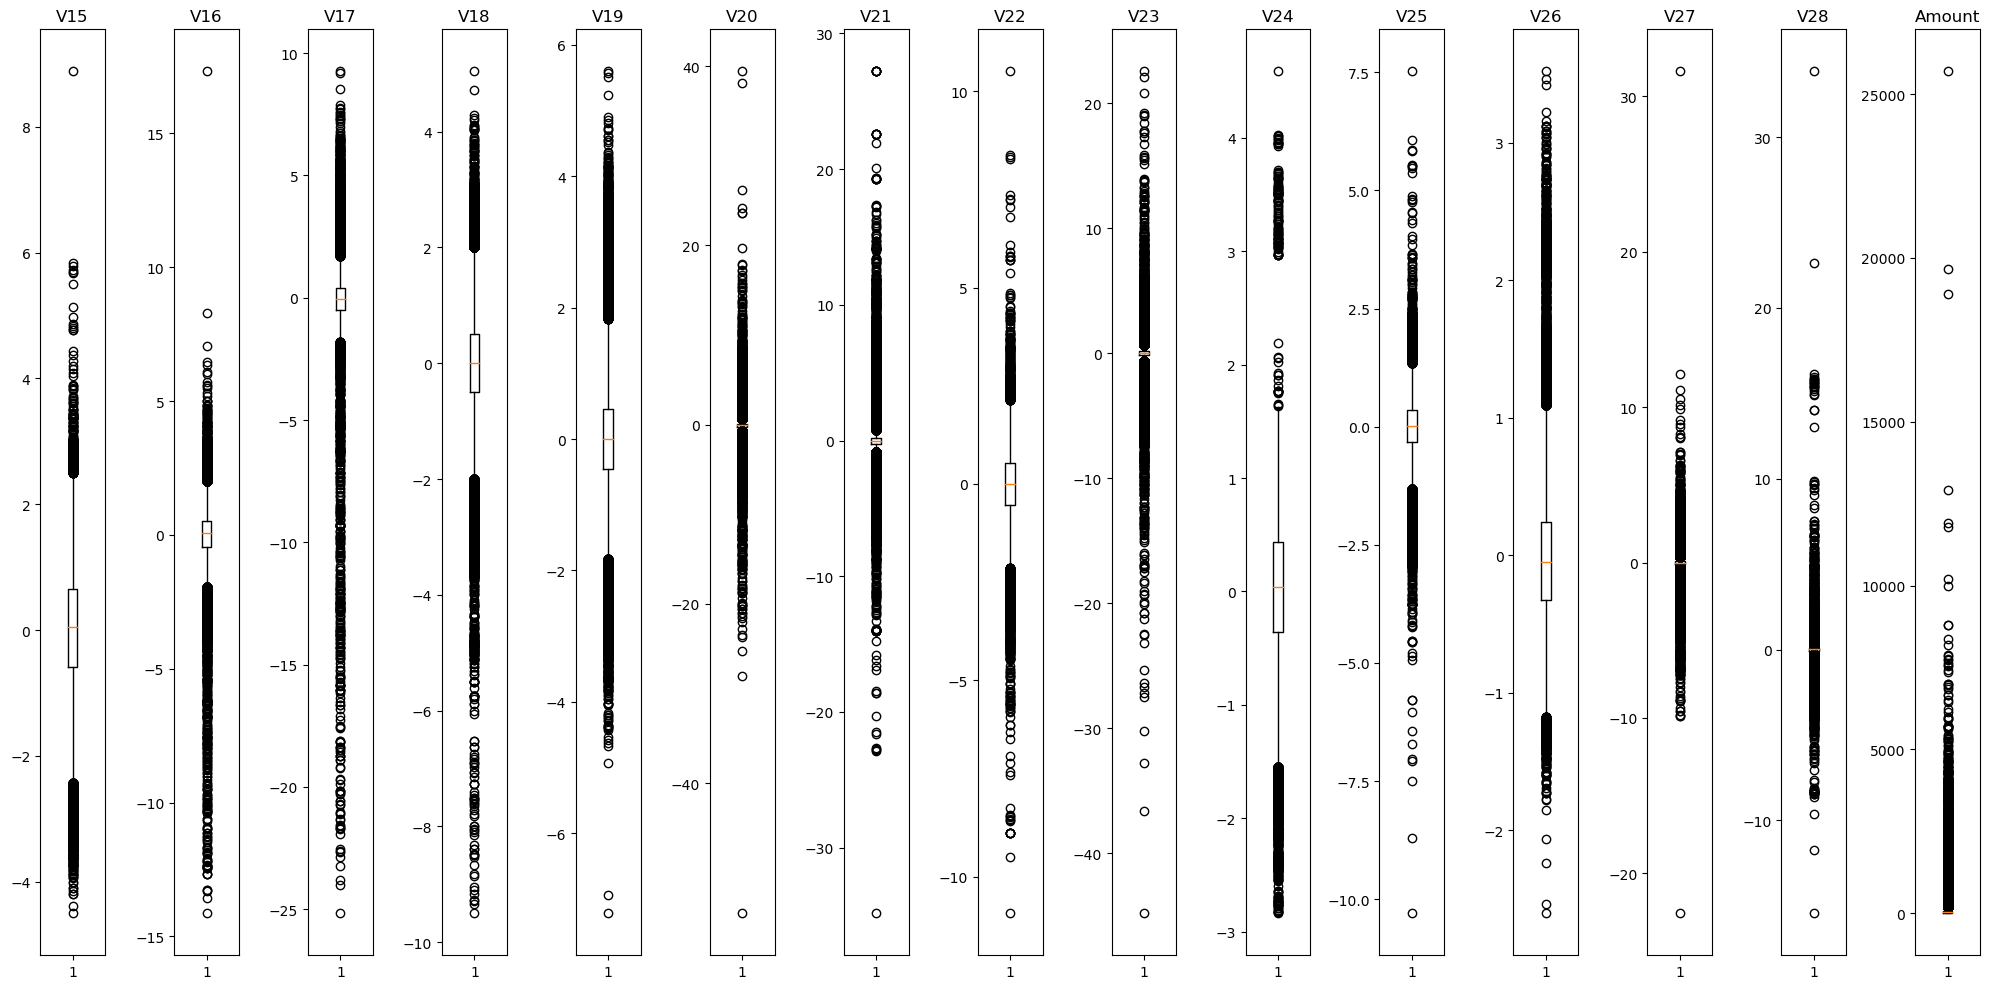

In [19]:
#make boxplots to check outlires (v15 - v28)
fig,axis = plt.subplots(1,15,figsize=(20,10))
for i, ax in enumerate(axis.flat):
    ax.boxplot(data.drop(columns=['Class']).iloc[:,i+15])
    ax.set_title(data.drop(columns=['Class']).columns[i+15])
plt.tight_layout()

## Build Model

In [20]:
# split our data to target and feautres
target ='Class'
X = data.drop(columns=target) # X = data.iloc[:, :-1]
y = data[target]

In [21]:
# split our data to test and train
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=55)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(227845, 30)
(227845,)
(56962, 30)
(56962,)


In [22]:
# oversample 
ROS = RandomOverSampler(sampling_strategy = 1)

# It will train the provided classifier by over-sampling the stream of given observations 
# so that the class distribution seen by the classifier follows a given desired distribution.

X_train_over, y_train_over = ROS.fit_resample(X_train,y_train)
X_test_over, y_test_over = ROS.fit_resample(X_test,y_test)

print(X_train_over.shape)
print(y_train_over.shape)
print(X_test_over.shape)
print(y_test_over.shape)

(454900, 30)
(454900,)
(113730, 30)
(113730,)


In [23]:
# undersample 
RUS = RandomUnderSampler(sampling_strategy = 1)

# It is a fast and easy way to balance the data by randomly selecting a subset of data for the targeted classes.

X_train_under, y_train_under = RUS.fit_resample(X_train,y_train)
X_test_under, y_test_under = RUS.fit_resample(X_test,y_test)

print(X_train_under.shape)
print(y_train_under.shape)
print(X_test_under.shape)
print(y_test_under.shape)

(790, 30)
(790,)
(194, 30)
(194,)


### Baseline model

In [24]:
y_baseline = data['Class'].value_counts(normalize=True).max()
print(f'baseline score = {y_baseline}')

baseline score = 0.9982725143693799


### Iterate

In [25]:
# logistic model for our normal data and oversampled data and undersampled
log = LogisticRegression(max_iter=400)
logover = LogisticRegression(max_iter=400)
logunder = LogisticRegression(max_iter=400)
# fit our normal data
log.fit(X_train,y_train)
# fit our oversampled data
logover.fit(X_train_over,y_train_over)
# fit our oversampled data
logunder.fit(X_train_under,y_train_under)

LogisticRegression(max_iter=400)

### Evaluate

Train Data

In [26]:
# get the prediction score for our logistic Regression model (LRM) on our train data
print(f'The accuracy score for LRM On Normal Data = {accuracy_score(y_train,log.predict(X_train))}')
print(f'The accuracy score for LRM On Oversampled Data = {accuracy_score(y_train,logover.predict(X_train))}')
print(f'The accuracy score for LRM On Undersampled Data = {accuracy_score(y_train,logunder.predict(X_train))}')

The accuracy score for LRM On Normal Data = 0.9991046544800193
The accuracy score for LRM On Oversampled Data = 0.9636682832627445
The accuracy score for LRM On Undersampled Data = 0.9511466128288968


Test Data

In [27]:
# get the prediction score for our logistic Regression model (LRM) on our test data
print(f'The accuracy score for LRM On Normal Data = {accuracy_score(y_test,log.predict(X_test))}')
print(f'The accuracy score for LRM On Oversampled Data = {accuracy_score(y_test,logover.predict(X_test))}')
print(f'The accuracy score for LRM On Undersampled Data = {accuracy_score(y_test,logunder.predict(X_test))}')

The accuracy score for LRM On Normal Data = 0.9992451107756047
The accuracy score for LRM On Oversampled Data = 0.9653804290579685
The accuracy score for LRM On Undersampled Data = 0.9527579790035462


Note: As we can see we our accuracy score is not the best thing in compare to our baseline score but thats ok in these types of model our most important metrics is Recall Score 

#### Confusion Matrix & Classification Reports

In [28]:
# Make Confusion matrix function to see more details about our model perdiction
def confusion(model,X,y):
    ConfusionMatrixDisplay.from_predictions(y,model.predict(X))

Function to evaluate model

In [29]:
def evalua(model,X,y):
    print('precision_score =',precision_score(y,model.predict(X)).round(2)*100,'%')
    print('recall_score =',recall_score(y,model.predict(X)).round(2)*100,'%')
    print('f1_score =',f1_score(y,model.predict(X)).round(2)*100,'%')
    print('----------------------------------------')

In [30]:
# print log models score
print('Normal Data')
evalua(log,X_test,y_test)

print('Oversampled Data')
evalua(logover,X_test,y_test)

print('Undersampled Data')
evalua(logunder,X_test,y_test)

Normal Data
precision_score = 91.0 %
recall_score = 62.0 %
f1_score = 74.0 %
----------------------------------------
Oversampled Data
precision_score = 4.0 %
recall_score = 90.0 %
f1_score = 8.0 %
----------------------------------------
Undersampled Data
precision_score = 3.0 %
recall_score = 91.0 %
f1_score = 6.0 %
----------------------------------------


None


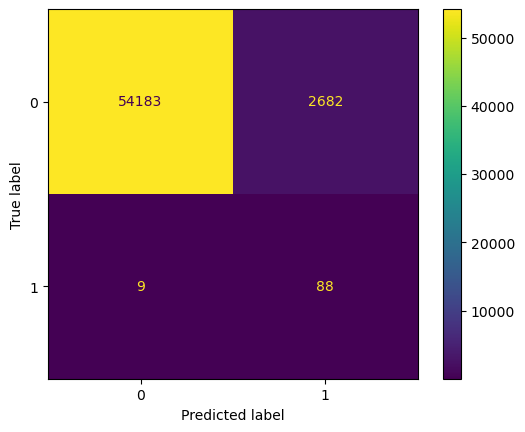

In [31]:
# Our Higest Recall andd precision and f1 score is undersampled data
print(confusion(logunder,X_test,y_test))

Change Thereshold

In [32]:
# change thereshold function to increase recall 
def thershold(model,X,y):
    predicted_props = model.predict_proba(X)

    # set new threshold
    new_threshold = 0.2
    y_Thereshold = []
    predictions = (predicted_props > new_threshold).astype(int)
    for i,j in predictions:
        y_Thereshold.append(j)
    
    return y_Thereshold


In [33]:
# assign new y value
y_log = thershold(log,X_test,y_test)
y_log_over = thershold(logover,X_test,y_test)
y_log_under = thershold(logunder,X_test,y_test)

Lets check Scores for our new threshold

In [34]:
# function to evaluate model
def evaluat(y_thres,y):
    print('precision_score =',precision_score(y,y_thres).round(2)*100,'%')
    print('recall_score =',recall_score(y,y_thres).round(2)*100,'%')
    print('f1_score =',f1_score(y,y_thres).round(2)*100,'%')
    print('----------------------------------------')

# print log models score
print('Normal Data')
evaluat(y_log,y_test)

print('Oversampled Data')
evaluat(y_log_over,y_test)

print('Undersampled Data')
evaluat(y_log_under,y_test)

Normal Data
precision_score = 78.0 %
recall_score = 68.0 %
f1_score = 73.0 %
----------------------------------------
Oversampled Data
precision_score = 1.0 %
recall_score = 92.0 %
f1_score = 2.0 %
----------------------------------------
Undersampled Data
precision_score = 1.0 %
recall_score = 94.0 %
f1_score = 2.0 %
----------------------------------------


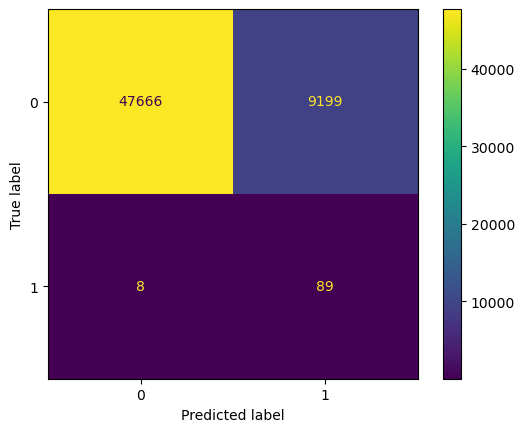

In [35]:
# Plot our best score Data variation in log 
ConfusionMatrixDisplay.from_predictions(y_test,y_log_over)

### Communicate results

Our Best model for this project is "logover" with threshold
in other project we may change diffrent model but where we value recall other than other metrics 

Oversampled Data
precision_score = 1.0 %
recall_score = 92.0 %
f1_score = 2.0 %
----------------------------------------


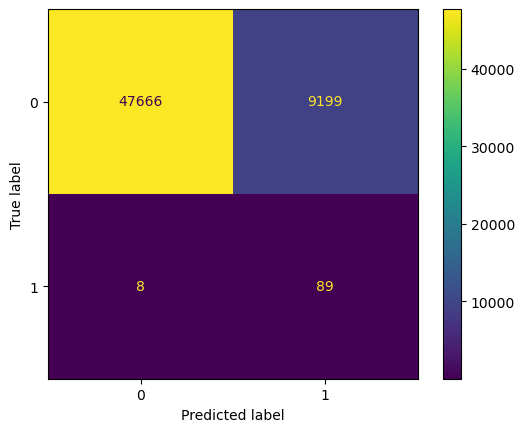

In [36]:
print('Oversampled Data')
evaluat(y_log_over,y_test)
ConfusionMatrixDisplay.from_predictions(y_test,y_log_over)

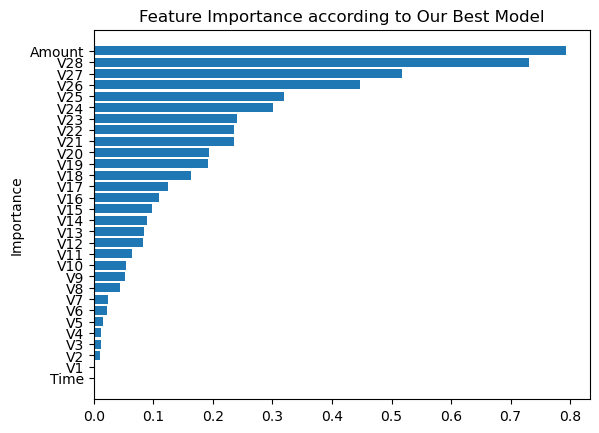

In [37]:
# Get the feature importances
importance = abs(logover.coef_[0])
importance.sort()

# Plot the feature importances
plt.barh(X.columns, importance)
plt.title('Feature Importance according to Our Best Model')
plt.ylabel('Importance')
plt.show()

## Acknowledgements

The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection.
More details on current and past projects on related topics are available on https://www.researchgate.net/project/Fraud-detection-5 and the page of the DefeatFraud project

# Thank You !